# Monte Carlo, Data Fitting, and Chi Squared of Sterile Neutrino Research

### Monte Carlo Simulation of Sterile Neutrino Detection:

The PIONEER research uses a spherical model detector for dark matter detection, specifically sterile neutrinos. We use a specific pion decay where it splits to a positron and theoretically sterile neutrino.

The specific errors and data is a bit hard to find because this research is a bit too sophisticated for an undergrad with no particle theory background. But, the rough idea for this project is to create a monte carlo for pion detection and find the mass of sterile neutrino depending on the positron which depends on the energy.

The actual model for monte carlo is actually a flat rectangle. This might cause a bit of error because the sphere is obviously circular. But, according to my professor, Professor Gori, to a particle, the sphere is extremely huge, just like how to us on Earth, the ground feels flat.

The dimensions of the detector is given (found by my research partner), so I'm not 100% sure if they're right. We, including the professor, had a rough time search for it since our department focuses on the theoretical part, not the experimental.

We can use these vectors to find the boundary conditions to detect the sterile neutrino. Just to clarify, the pion decays into many other particles, but we are specifically studying the decay to positron and sterile neutrino.

Using basic trig, you can find:
$$
sin(\phi) = \frac{w}{|\vec{a}|}
\\
sin(\theta) = \frac{\ell}{|\vec{b}|}
$$

The vectors can be found using distance formula of the vectors assuming the max angles create a 90 deg angles:
$$
\vec{a} = \sqrt{d^2+(\frac{w}{2})^2}
\\
\vec{b} = \sqrt{d^2+(\frac{\ell}{2})^2}
$$

Plug these into the eqns.:
$$
sin(\phi) = \frac{w}{\sqrt{d^2+(\frac{w}{2})^2}}
\\
sin(\theta) = \frac{\ell}{\sqrt{d^2+(\frac{\ell}{2})^2}}
$$

But since the detector we are imaging is a square, we just need to use one of these angles to create a boundary.

Our monte carlo depends on the angles where the pions might decay inside, so our boundary condition should be in terms of the angle. For this we can choose the condition from $\theta$. Then we have:
$$
\theta = \arcsin\left(\frac{\ell}{\sqrt{d^2+(\frac{\ell}{2})^2}}\right)
$$

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#number of runs
runs = 100

#detector size
length = 60 #mm

area = length**2

#detector distance
distance = 20 #mm

#mass of positron: Me
mass_pos = 0.51099 #MeV/c^2
mass_pos_2 = mass_pos**2
mass_pos_4 = mass_pos**4

#mass of pion: Mp 	2.4063 × 10−28
mass_pi = 139.57039 #MeV/c^2
mass_pi_2 = mass_pi**2
mass_pi_4 = mass_pi**4

#energy of positron: Ee
E_pos = 40 #MeV

#angle Phi - 0 to 2pi
ran_phi = random.uniform(0,1) * 2*math.pi
#angle Theta 0 to pi
ran_theta = random.uniform(0,1)*math.pi

for k in range(0,1):
  sum = 0

  #create an numpy array of theta of detection condition and total theta
  #theta is the only condition to detection
  theta_array = np.array([])
  total_array = np.array([])

  #detection_rate will be the length of theta array/total array
  detection_rate = np.array([])

  #run for loop twice, simulate runs as many as possible
  for j in range(0,runs):
    #this for loop creates 1 set of data, but for loops must be high numbers, maybe bigger than 250
    for i in range(0,runs):
      ran_theta = random.uniform(0,1)*math.pi

      #the condition to be detected is tan(theta) = length/(2*distance), arc tan
      if (ran_theta >=0) & (ran_theta <= math.atan(length/(2*distance))):
          theta_array = np.append(theta_array,ran_theta)
      total_array = np.append(total_array,ran_theta)

      #move the dectection value to an array to plot in histogram
      detection = len(theta_array) / len(total_array)
      detection_rate = np.append(detection_rate, detection)

    #find the sum of the number of detections of theta array for average later in calculations
    sum += len(theta_array)

    #reset the theta and total arrays and re run over and over by resetting 1
    #set of data for the next set of data, but detection_rate is added on
    theta_array = np.array([])
    total_array = np.array([])

  #find the average by finding the sum of all detections divide by the number of runs
  avg = (sum/runs**2)*100

  x_intervals = [.0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
  bins_intervals = [.0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]

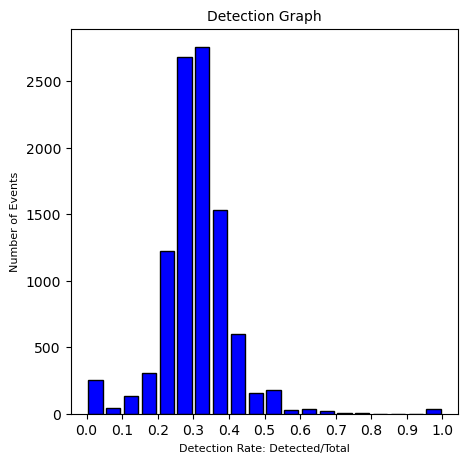

Average detection rate = 30.99%.


In [ ]:
plt.figure(figsize=(5,5))
plt.hist(detection_rate,bins = bins_intervals,rwidth=.8, ec='black',color="blue")
plt.xticks(x_intervals)
plt.xlabel("Detection Rate: Detected/Total",fontsize=8)
plt.ylabel("Number of Events",fontsize=8)
plt.title("Detection Graph",fontsize=10)
plt.show()

print(f"Average detection rate = {avg:.2f}%.")

### Data Fitting Positron Energy Vs. Probability:

This graph shows that the detection rates with all the known varables that the sterile neutrino detection is around 30%.
Why not 40% or 90% or etc? Maybe there is an error in the coding or the modeling. Although, I've checked with the professor and she said that some other group that is also part of this research also got roughly 30%. The specific details could be the design of the sphere or the mathematical representation of the model since the boundary condition depends on $\theta$, $\ell$, and $d$.

But, moving on, what we want to do now is find the mass of sterile neutrino that depends on the mass of the positron.
The equation starts from:
$$
m_\pi = E_{e^+} + E_N \quad(1)
$$

$m_\pi$ = mass of pion

$E_{e^+}$ = energy of positron

$E_N$ = energy of sterile neutrino

$$
E = \sqrt{m^2c^4+p^2}
$$
m = mass

p = momentum

c = speed of light = 1

Generic equation of E:
$$
E^2 = m^2 + p^2
$$

Replace this E with energy of positron and sterile neutrino, respectively:

$$
E_{e^+}^2 = m_{e^+}^2 + p_{e^+}^2\rightarrow E_{e^+} = \sqrt{m_{e^+}^2 + p_{e^+}^2}
\\
E_N^2 = m_N^2 + p_N^2\rightarrow E_N = \sqrt{m_N^2 + p_N^2}
$$

Let's solve for mass of sterile neutrino!

Plug these bad boys into $(1)$:
$$
m_\pi = \sqrt{m_{e^+}^2 + p_{e^+}^2} + \sqrt{m_N^2 + p_N^2}
$$

Since the momentum p is conserved in the pion decay, we set $p_e$ = $p_N$.

From here, it's basic algebra to solve for $m_N$:

$$
m_\pi = \sqrt{m_{e^+}^2 + p_{e^+}^2} + \sqrt{m_N^2 +p_{e^+}^2}
\\
m_\pi - \sqrt{m_{e^+}^2 + p_{e^+}^2} = \sqrt{m_N^2 +p_{e^+}^2}
\\
(m_\pi - \sqrt{m_{e^+}^2 + p_{e^+}^2})^2 = (\sqrt{m_N^2 +p_{e^+}^2})^2
\\
m_\pi - 2m_\pi\sqrt{m_{e^+}^2 + p_{e^+}^2}+ p_{e^+}^2+m_{e^+}^2 = p_{e^+}^2 + m_N^2
$$

Thankfully, $p_{e^+}$ cancels and $\sqrt{m_{e^+}^2 + p_{e^+}^2}$ = $E_{e^+}$.

So, finally we have:

Mass of sterile neutrino: $m_N = \sqrt{m_\pi+m_{e^+} - 2m_\pi E_{e^+}}$

As Professor Hance told me, in the abstract of the research paper, it tells us the upper limit in which they find the mass of sterile neutrino to be 60-135 MeV! So, when we calculate the mass of sterile neurtino, we can check with the bounds that are theoretically given.

To create a gaussian graph to represent the sterile neutrino detection that can be used to create data fitting, Professor Gori gave me the guassian equation with a given $\sigma$.

The image below is finding the area under the curve, which matches the $\sigma$ with $E_{e^+}$ = 40.

![Untitled.png](attachment:Untitled.png)

In [ ]:
#E_pos = x axis = 0-55 (MeV)
E_pos = np.linspace(0,100,1000) #MeV

#constants
m_pion = 139.57039 #MeV/c^2
m_pos = 0.5109989461 #MeV/c^2

def f(E_pos,m_neutrino,sigma_numerator):
  sig = (sigma_numerator/100) * E_pos_0(m_neutrino)

  return np.exp((-(E_pos - E_pos_0(m_neutrino))**2)/(2*(sig**2)))

#input neutrino, returns energy of positron
def E_pos_0(m_neutrino):
  return (m_pos**2 + m_pion**2 - m_neutrino**2)/(2*m_pion)

#input energy positron, returns mass of neutrino
def m_neutrino(E_pos):
  return np.sqrt(m_pion**2 + m_pos**2 -2*m_pion*E_pos)

#graph with energy of positron
def graph_E_pos_input(E_pos_input,sigma_numerator):
  plt.xlim([4,60])
  #define mass of neutrino depending on energy of positron inputed
  neutrino_mass = m_neutrino(E_pos_input)

  plt.plot(E_pos,f(E_pos,neutrino_mass,sigma_numerator))
  plt.axhline(color = 'black')
  plt.fill_between(E_pos,f(E_pos,neutrino_mass,sigma_numerator), where = [(E_pos>0) and (E_pos<100) for E_pos in E_pos], color = 'green' , alpha = 0.3)
  plt.xlabel('Positron Energy (MeV)', fontsize=16)
  plt.ylabel('Events', fontsize=16)
  plt.title(f'Energy of Positron = {E_pos_input} MeV', fontsize=16)


  print(f"Energy of Positrons: {E_pos_input} MeV.")
  print(f"Mass of Sterile Neutrino: {neutrino_mass:.5f} MeV.")

def integrate_guass(E_pos_input,sigma_numerator):
  x = smp.symbols('x', real = True)
  mass_neutrino = m_neutrino(E_pos_input)
  sig = (sigma_numerator/100) * E_pos_0(mass_neutrino)

  f = smp.exp((-(x - E_pos_0(mass_neutrino))**2)/(2*(sig**2)))

  print(f"Area under Gaussian: {float(smp.integrate(f, (x, 0 , smp.oo))):.5f}.")

Energy of Positrons: 40 MeV.
Mass of Sterile Neutrino: 91.18401 MeV.


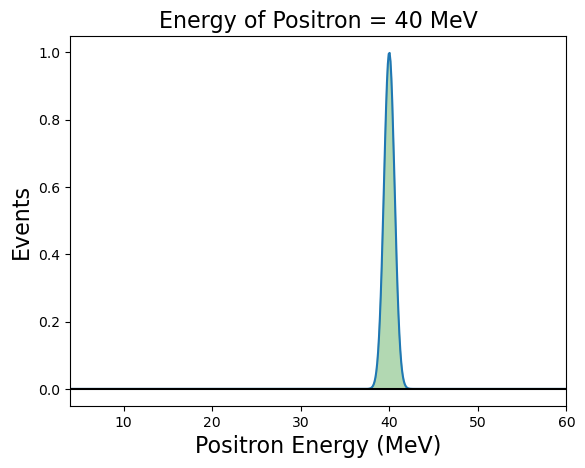

In [ ]:
graph_E_pos_input(40,1.5)

Now, I've created a function that can calculate the sterile neutrino with different $E_{e^+}$!

![Untitled.png](attachment:Untitled.png)

As you can see, the width of my graph is a lot thinner than the red graph that I'm comparing with. To match the width, I just put higher values of sigma and it seems 5 works the best just from eyeballing the widths of each gaussian, given that the red gaussian isn't really gaussian since it's not symmetrical.

Energy of Positrons: 40 MeV.
Mass of Sterile Neutrino: 91.18401 MeV.


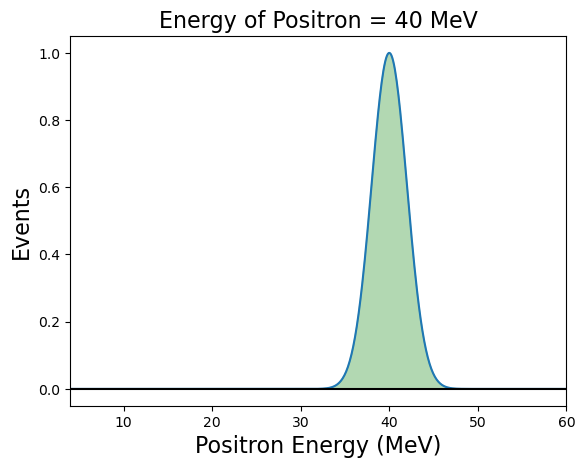

In [ ]:
graph_E_pos_input(40,5.)

### Reduced Chi Squared with Graph Below:

![Untitled.png](attachment:Untitled.png)

In [ ]:
#Data points from the image above using digitizing tool online
data_x = [0.5336376479688545, 1.6664632801900914, 2.7795768681965276, 3.884730861531613, 5.018570137333127, 6.141188711043138, 7.252665513924045, 8.335774836526605, 9.447311876423553, 10.568399599070728, 11.673858931762988, 12.781916764698947, 13.913869998756832, 15.00472497076687, 16.120713318435403, 17.22748747978814, 18.350629492396166, 19.5051362961152, 20.569844248886472, 21.6823679295634, 22.805327153984816, 23.927268580548986, 25.028849895691298, 26.172954389881593, 27.230321735249795, 28.38580894833336, 29.508020402900474, 30.61342365285366, 31.727031599819327, 32.814048019910615, 33.935835738226956, 35.0364283354508, 36.15233359757997, 37.30687363551475, 38.4059416130912, 39.48773610703328, 40.629642988707324, 41.723675982598145, 42.847810867401606, 43.933011868457726, 45.060304003757125, 46.15763964783778, 47.29586999439484, 48.38305258556486, 49.49524392408432, 50.64741602414715, 51.766545005203746, 52.84865937847239, 53.982344946026075, 55.02065662294047, 56.16288338394108, 57.314523736551955]
data_y = [-0.9098289123860938, 1.826152253769813, -0.7341951981815599, 6.084894364053335, 11.241328922533638, 11.183853225904654, 13.221074422097294, 12.337304406064172, 3.2938323219613173, 10.410711748827959, -2.5949708765449637, 8.081505083920199, 12.289123860938039, -14.11495139325797, -10.09382420392507, 0.7563168469547217, 8.965234509772086, 5.510827430844478, 12.540640918961703, -16.77433888742313, 6.8706999776754, 10.865991516652121, 13.108375783897875, 9.824021269254967, 7.888437886875165, -18.757960749294746, -13.584072412883323, 7.724189718507093, -8.179165059971993, 10.901609400685974, -11.475473382988655, 28.088202463824, 3.133866417713555, -9.336939094433056, -13.345665983398616, 17.16402492237128, -0.09441276155298033, -16.566720110405292, 7.587096381385343, -12.336289651533294, 5.0146327603352745, 0.9362531203701824, -6.085320560956305, 17.198851297871045, 6.556369614190327, 9.641061027337487, -19.8918271670083, -44.915146226127895, 38.526495240801246, 1.874332798895947, -5.044669494449293, 17.56556329024009]

upper_x = [4.460446025785428, 5.45277168743768, 6.460075059109489, 7.479267532694335, 8.501811869098262, 9.493180915034449, 10.49188030698095, 11.497969369943412, 12.472823817432486, 13.483258437058625, 14.50553581093714, 15.4825315203488, 16.48504810562743, 17.500825683574696, 18.504489836931317, 19.516945214562323, 20.511699493633266, 21.514343998455324, 22.527318469885746, 23.516993045348126, 24.512733602637958, 25.511974335260994, 26.527507197559963, 27.50705573612089, 28.515384318046546, 29.55974913309018, 30.564651695939695, 31.519090925860336, 32.52967015018774, 33.532385103454004, 34.55692424317283, 35.547414537462856, 36.546707179465834, 37.57664118688572, 38.56841067661003, 39.55601629250046, 40.573421600290175, 41.57860224910365, 42.565555289931964, 43.57322017335694, 44.570518012045014, 45.57117142136503, 46.58737168997753, 47.57831062962277, 48.559509144903274, 49.625757471405116, 50.59873947340344, 51.6037643940771, 52.620824875271495, 53.538078450089735, 54.56850930443192, 55.58965579539028]
upper_y = [7.955170812300618, 11.301421976555027, 9.51793903494413, 17.732177073261106, 23.328963096624868, 25.221534455585758, 27.38728367708976, 26.829010047483816, 18.995393740054666, 26.942362110403042, 14.204172789312462, 26.635278114047445, 32.38918962817458, 6.116280781363809, 10.969710351268562, 23.51390379895896, 32.53299630230263, 29.61755606820818, 36.96897436483102, 7.82301810272848, 32.94307779376645, 37.6154445484977, 40.589946425263115, 38.647327988549065, 37.05796273878319, 9.924081730024948, 15.802105936365091, 38.38580409056186, 22.497998878255157, 42.566247661974124, 20.61050328782907, 61.21480398650861, 35.385009732786166, 23.57869090853719, 20.339010580439513, 51.42468193965419, 33.689317283753226, 16.820366013669044, 42.05568625659533, 21.314654505125258, 39.33269886226648, 35.50469635483683, 27.69972768501811, 51.51348758593911, 39.392735052496135, 41.4089318298907, 8.961492682010716, -20.705278037910915, 65.07427625885404, 29.60616604361608, 25.166350700075377, 53.166117214722775]

lower_x = [4.464767481665561, 5.437252636741589, 6.464035003236457, 7.461970585735247, 8.481214968700034, 9.480555812270099, 10.491776488221067, 11.480171868249174, 12.49497799922896, 13.500533137140597, 14.480090945233657, 15.518117254205146, 16.49280299620941, 17.502764869696797, 18.490971151269402, 19.53125737217477, 20.523267869734525, 21.52778852786018, 22.506658536669015, 23.510493249416875, 24.525050956935516, 25.530150033866235, 26.509921041198343, 27.507882578387104, 28.514301636693478, 29.525181193861975, 30.566716947698797, 31.557214657614534, 32.52498718255444, 33.52192165558293, 34.54124019480478, 35.53945757108039, 36.55235047062805, 37.520749615940105, 38.56188492598881, 39.56450718393375, 40.57665852091081, 41.581342322802, 42.57911476153526, 43.558344428190836, 44.56770748990247, 45.59764520513521, 46.57467613876897, 47.557001829156775, 48.548711993875436, 49.58871642100398, 50.578220437075124, 51.594242730670686, 52.607595399012105, 53.56057004285583, 54.56514261036143, 55.56699364323295]
lower_y = [-7.860172728403239, -7.729481840169125, -11.976052524052799, -6.007029939420703, -1.8015526775947965, -2.2979425372244178, -0.8436333366325829, -3.4881493494133684, -12.189742379368017, -7.364879234777137, -20.670559781132862, -10.584479822551133, -7.560844506368821, -34.67679790066214, -30.66332681097077, -21.42423019625459, -13.902936078308958, -18.82277700372308, -12.541026168124683, -41.79014234992856, -20.08828791789437, -15.911397384456475, -13.96301287468689, -18.90354263264887, -20.756380875519316, -48.35302985313264, -44.43246563070231, -23.85111755733715, -39.69011417941319, -21.591060556456505, -43.549931604018994, -5.399886810361674, -30.316428486228173, -42.99301828038038, -47.02987851148012, -17.98462549710808, -34.49500417481962, -51.91922421953714, -27.36220938052783, -47.3626865027701, -29.07107852467712, -33.112202401346096, -41.20342411345358, -17.211037766255785, -27.289402556664612, -22.79592618817397, -49.072042920698735, -71.93054318336975, 11.976154039423495, -26.133751576660604, -36.588697786203554, -17.20161713985519]

#branching ratio is 1.235
Acc_pos= 1.235

#This is a constant given by professor to be 1
U_UL=1

delta_pos=m_pos/m_pion

N= 10000000 #number of events

#the normalizing constant of the gaussian for 40 MeV
norm = 5

#This is just a simple version of the term in Expected_Number
def delta_neutrino(m_neutrino):
    return m_neutrino/m_pion

#This equation is given by my research partner for reduced chi squared.
def Expected_Number(delta_neutrino):
    rho_pos=np.sqrt(1+delta_pos**2+delta_neutrino**2-2*(delta_pos+delta_neutrino+delta_pos*delta_neutrino))*(
        delta_pos+delta_neutrino-(delta_pos-delta_neutrino)**2)/(delta_pos*(1-delta_pos)**2)

    return N*Acc_pos*rho_pos*U_UL**2/norm

#normalizing factor for 40 MeV
Factor=(Expected_Number(delta_neutrino(m_neutrino(40))))

#Experimented values with for chi squared.
stdevs = []

for i in range(len(data_x)):
  stdevs.append(((upper_y[i] - data_y[i]) + (data_y[i] - lower_y[i]))/2)

expected = []
neutrino_mass = m_neutrino(40)
sig = (5/100) * E_pos_0(neutrino_mass)
for i in range(len(data_x)):
  y = Factor*np.exp(-(data_x[i]- 40)**2/(2*(sig*2)))
  if y < 1e-8:
    expected.append(1e-12)
  else:
    expected.append(y)

Text(0, 0.5, 'Chi squared')

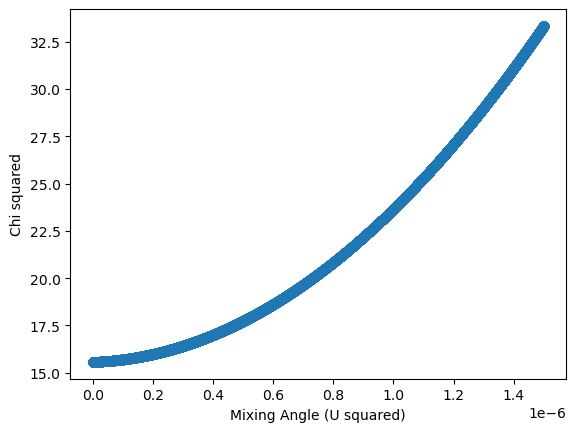

In [ ]:
#testing a range of U-squared values against full data set
U_squared = np.linspace(1e-12, 1.5e-6, 100000)
chi_vals = []
for i in U_squared:
  expected = []
  neutrino_mass = m_neutrino(40)
  sig = (5/100) * E_pos_0(neutrino_mass)

  #Reduced Chi Squared
  for j in range(len(data_x)):
    y = Factor*i*np.exp(-(data_x[j]- 40)**2/(2*(sig*2)))
    expected.append(y)

  chi_squared = 0

  for i in range(len(data_x)):
    O = data_y[i]
    E = expected[i]
    sigma = stdevs[i]
    #print("Observed-", O, "; Expected -", E, ";", ((O-E)**2)/E)
    chi_squared += ((O-E)/sigma)**2

  chi_vals.append(chi_squared)

plt.scatter(U_squared, chi_vals)
plt.xlabel("Mixing Angle (U squared)")
plt.ylabel("Chi squared")

![image.png](attachment:image.png)

![image-2.png](attachment:image-2.png)

As you can see from this chi squared table, we have about 52 data points, so 51 degrees of freedom. For a 90% confidence interval with ~51 degrees of fredom, Chi_squared should be less than 37.7.

# Summary:

This project used monte carlo to find detection rate of sterile neutrino in a given model, did some data fitting using the gaussian equation given by the professor and the given red graph, and finally did reduced chi squared we learned from school with some help from my research partner who was in charge of doing chi squared for research. This class taught me how to use python to model scientific data, so it taught me more than what the course directly taught!

I received some guidance from the professor and from my research partner because this project was pretty tough for me. In the end, this helped me learn more about the research that I'm doing with Professor Gori. Hopefully people who see this will learn as much as I did.